# DSA5101 - Introduction to Big Data for Industry


**Prepared by Dr Li Xiaoli for your personal study**

**Do not distribute without Dr Li's agreement**

# Decision Trees (DTs) are a supervised learning method (we have some training data with target variable values) used for classification and regression. 


## The goal of DTs is to create a model that predicts the value of a target variable (classification: predict categorical/discrete value, say high quality of bad quality; regression: predict numerical values, e.g. stock price) by learning simple decision rules inferred from the data and corresponding features.

## We mainly talk about DTs for classification, and briefly show a small piece of codes on regresssion. 

# Some advantages of decision trees are:
### 1. Simple to understand and to interpret. Trees can be visualised to users.
### 2. It requires little data preparation, as algorithms are able to handle both numerical and categorical features. Some techniques are usually specialised in analysing datasets that have only one type of variable, e.g. neural networks mainly process numerical data. 
### 3. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network or SVM), results are more difficult to interpret.

In [1]:
import pandas as pd  # using pandas package
import matplotlib.pyplot as plt # using visualization package
# You can also export the tree in Graphviz format using the export_graphviz exporter
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function

# 1.  DTs for Classification

In [2]:
#################################
#   DecisionTreeClassifier      #
#################################

## DT is a class capable of performing multi-class classification (classify fruits into oranges, apples, pears, ....) on a dataset. As with other classifiers, DecisionTreeClassifier takes as input two arrays:

> **an array X**, of size [n_samples, n_features] 
holding the **training**  samples,

>> n_samples. The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

>> n_features. The number of features or distinct traits that can be used to describe each item in a quantitative manner. The number of features must be fixed in advance.

> **an array Y** of integer values, size [n_samples], 
holding the class labels for the *training* samples.

# What is n_samples and n_features?

In [3]:
# We use Iris data to illustrate 
from sklearn.datasets import load_iris
iris = load_iris()

Take a look at data from Wiki page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [4]:
# We can access iris.data (150 records and each record has 4 features)
# We can access iris.target, i.e. 150 class labels
# iris.target_names, i.e. 'setosa', 'versicolor', 'virginica'

In [5]:
n_samples, n_features = iris.data.shape

In [6]:
iris.data.shape

(150, 4)

In [7]:
n_samples

150

In [8]:
n_features

4

In [9]:
# 'feature_names': 
#['sepal length (cm)', 'sepal width (cm)', 
# 'petal length (cm)', 'petal width (cm)'], 
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
len(iris.target) == n_samples
# meaning that each training examle get 1 label that is stored in iris.target

True

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# first and last label
iris.target[0], iris.target[n_samples-1]

(0, 2)

In [13]:
#The names of the classes are stored in the target_names:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [14]:
iris.target_names[0]

'setosa'

In [15]:
iris.target_names[1], iris.target_names[2]

('versicolor', 'virginica')

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
# print all the data 
for i in range(n_samples):
    print (i+1, iris.data[i],iris.target[i] )

1 [5.1 3.5 1.4 0.2] 0
2 [4.9 3.  1.4 0.2] 0
3 [4.7 3.2 1.3 0.2] 0
4 [4.6 3.1 1.5 0.2] 0
5 [5.  3.6 1.4 0.2] 0
6 [5.4 3.9 1.7 0.4] 0
7 [4.6 3.4 1.4 0.3] 0
8 [5.  3.4 1.5 0.2] 0
9 [4.4 2.9 1.4 0.2] 0
10 [4.9 3.1 1.5 0.1] 0
11 [5.4 3.7 1.5 0.2] 0
12 [4.8 3.4 1.6 0.2] 0
13 [4.8 3.  1.4 0.1] 0
14 [4.3 3.  1.1 0.1] 0
15 [5.8 4.  1.2 0.2] 0
16 [5.7 4.4 1.5 0.4] 0
17 [5.4 3.9 1.3 0.4] 0
18 [5.1 3.5 1.4 0.3] 0
19 [5.7 3.8 1.7 0.3] 0
20 [5.1 3.8 1.5 0.3] 0
21 [5.4 3.4 1.7 0.2] 0
22 [5.1 3.7 1.5 0.4] 0
23 [4.6 3.6 1.  0.2] 0
24 [5.1 3.3 1.7 0.5] 0
25 [4.8 3.4 1.9 0.2] 0
26 [5.  3.  1.6 0.2] 0
27 [5.  3.4 1.6 0.4] 0
28 [5.2 3.5 1.5 0.2] 0
29 [5.2 3.4 1.4 0.2] 0
30 [4.7 3.2 1.6 0.2] 0
31 [4.8 3.1 1.6 0.2] 0
32 [5.4 3.4 1.5 0.4] 0
33 [5.2 4.1 1.5 0.1] 0
34 [5.5 4.2 1.4 0.2] 0
35 [4.9 3.1 1.5 0.2] 0
36 [5.  3.2 1.2 0.2] 0
37 [5.5 3.5 1.3 0.2] 0
38 [4.9 3.6 1.4 0.1] 0
39 [4.4 3.  1.3 0.2] 0
40 [5.1 3.4 1.5 0.2] 0
41 [5.  3.5 1.3 0.3] 0
42 [4.5 2.3 1.3 0.3] 0
43 [4.4 3.2 1.3 0.2] 0
44 [5.  3.5 1.6 0.6]

## 1.1 DTs for Classification: A toy example

In [18]:
from sklearn import tree

In [19]:
X = [[0, 0, 0], [1, 1, 1]]      # training samples: 2 3-D vectors
Y = [0, 1]                      # class labels of the two training examples
clf = tree.DecisionTreeClassifier()  # We want to build a DT
clf = clf.fit(X, Y)                  # Fit the training data X and labels Y

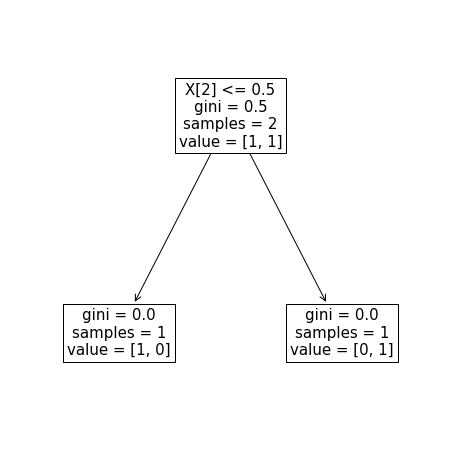

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(clf, fontsize=15)
plt.show()

In [21]:
#After being fitted, the model can then be used to predict the class 
#of new/test samples with same dimensions (3-D):
clf.predict([[2., 2., 2.0]])

array([1])

In [22]:
clf.predict([[0.7, 0.8, 0.9]])

array([1])

In [23]:
clf.predict([[0, 0.1, 0.2]])

array([0])

In [24]:
clf.predict([[0.49, 0.5, 0.5]])

array([0])

In [25]:
clf.predict([[0.49, 0.5, 0.51]])

array([1])

In [26]:
clf.predict([[0.51, 0.51, 0.52]])

array([1])

### Hopefully all the predictions make sense to you

In [27]:
#Alternatively, the probability of each class can be predicted,
#which is the fraction of training samples of the same class in a leaf:
clf.predict_proba([[2., 2.,2.0]])
# The following probability means it is 100% belongs to class 1

array([[0., 1.]])

In [28]:
clf.predict_proba([[0.48, 0.49, 0.50]])
# The following probability means it is 100% belongs to class 0

array([[1., 0.]])

In [29]:
# It seems the probability does not really provide useful information,
# The probability outputs from predict_proba should not be considered too seriously.

### DecisionTreeClassifier is capable of handle the following cases

* binary cases (where the labels are [-1, 1] or [0, 1]) classification
* multiclass (where the labels are [0, ..., K-1]) classification.

## 1.2. DTs for Classification: Using the Iris dataset

In [30]:
# we can construct a tree as follows:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [31]:
clf = tree.DecisionTreeClassifier()         # We want to build a DT
clf = clf.fit(iris.data, iris.target)

In [32]:
 clf.predict([[ 5.9,  3,  5.0,  1.8]])

array([2])

In [33]:
 clf.predict([[ 5.1,  3.5,  1.4,  0.2]])

array([0])

In [34]:
# classify training data. We can build a model from training data and 
# also test the model performance using the training data
# but the results will typically look good
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
iris.feature_names  # Should be X[0], X[1], X[2], X[3] in visualization

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

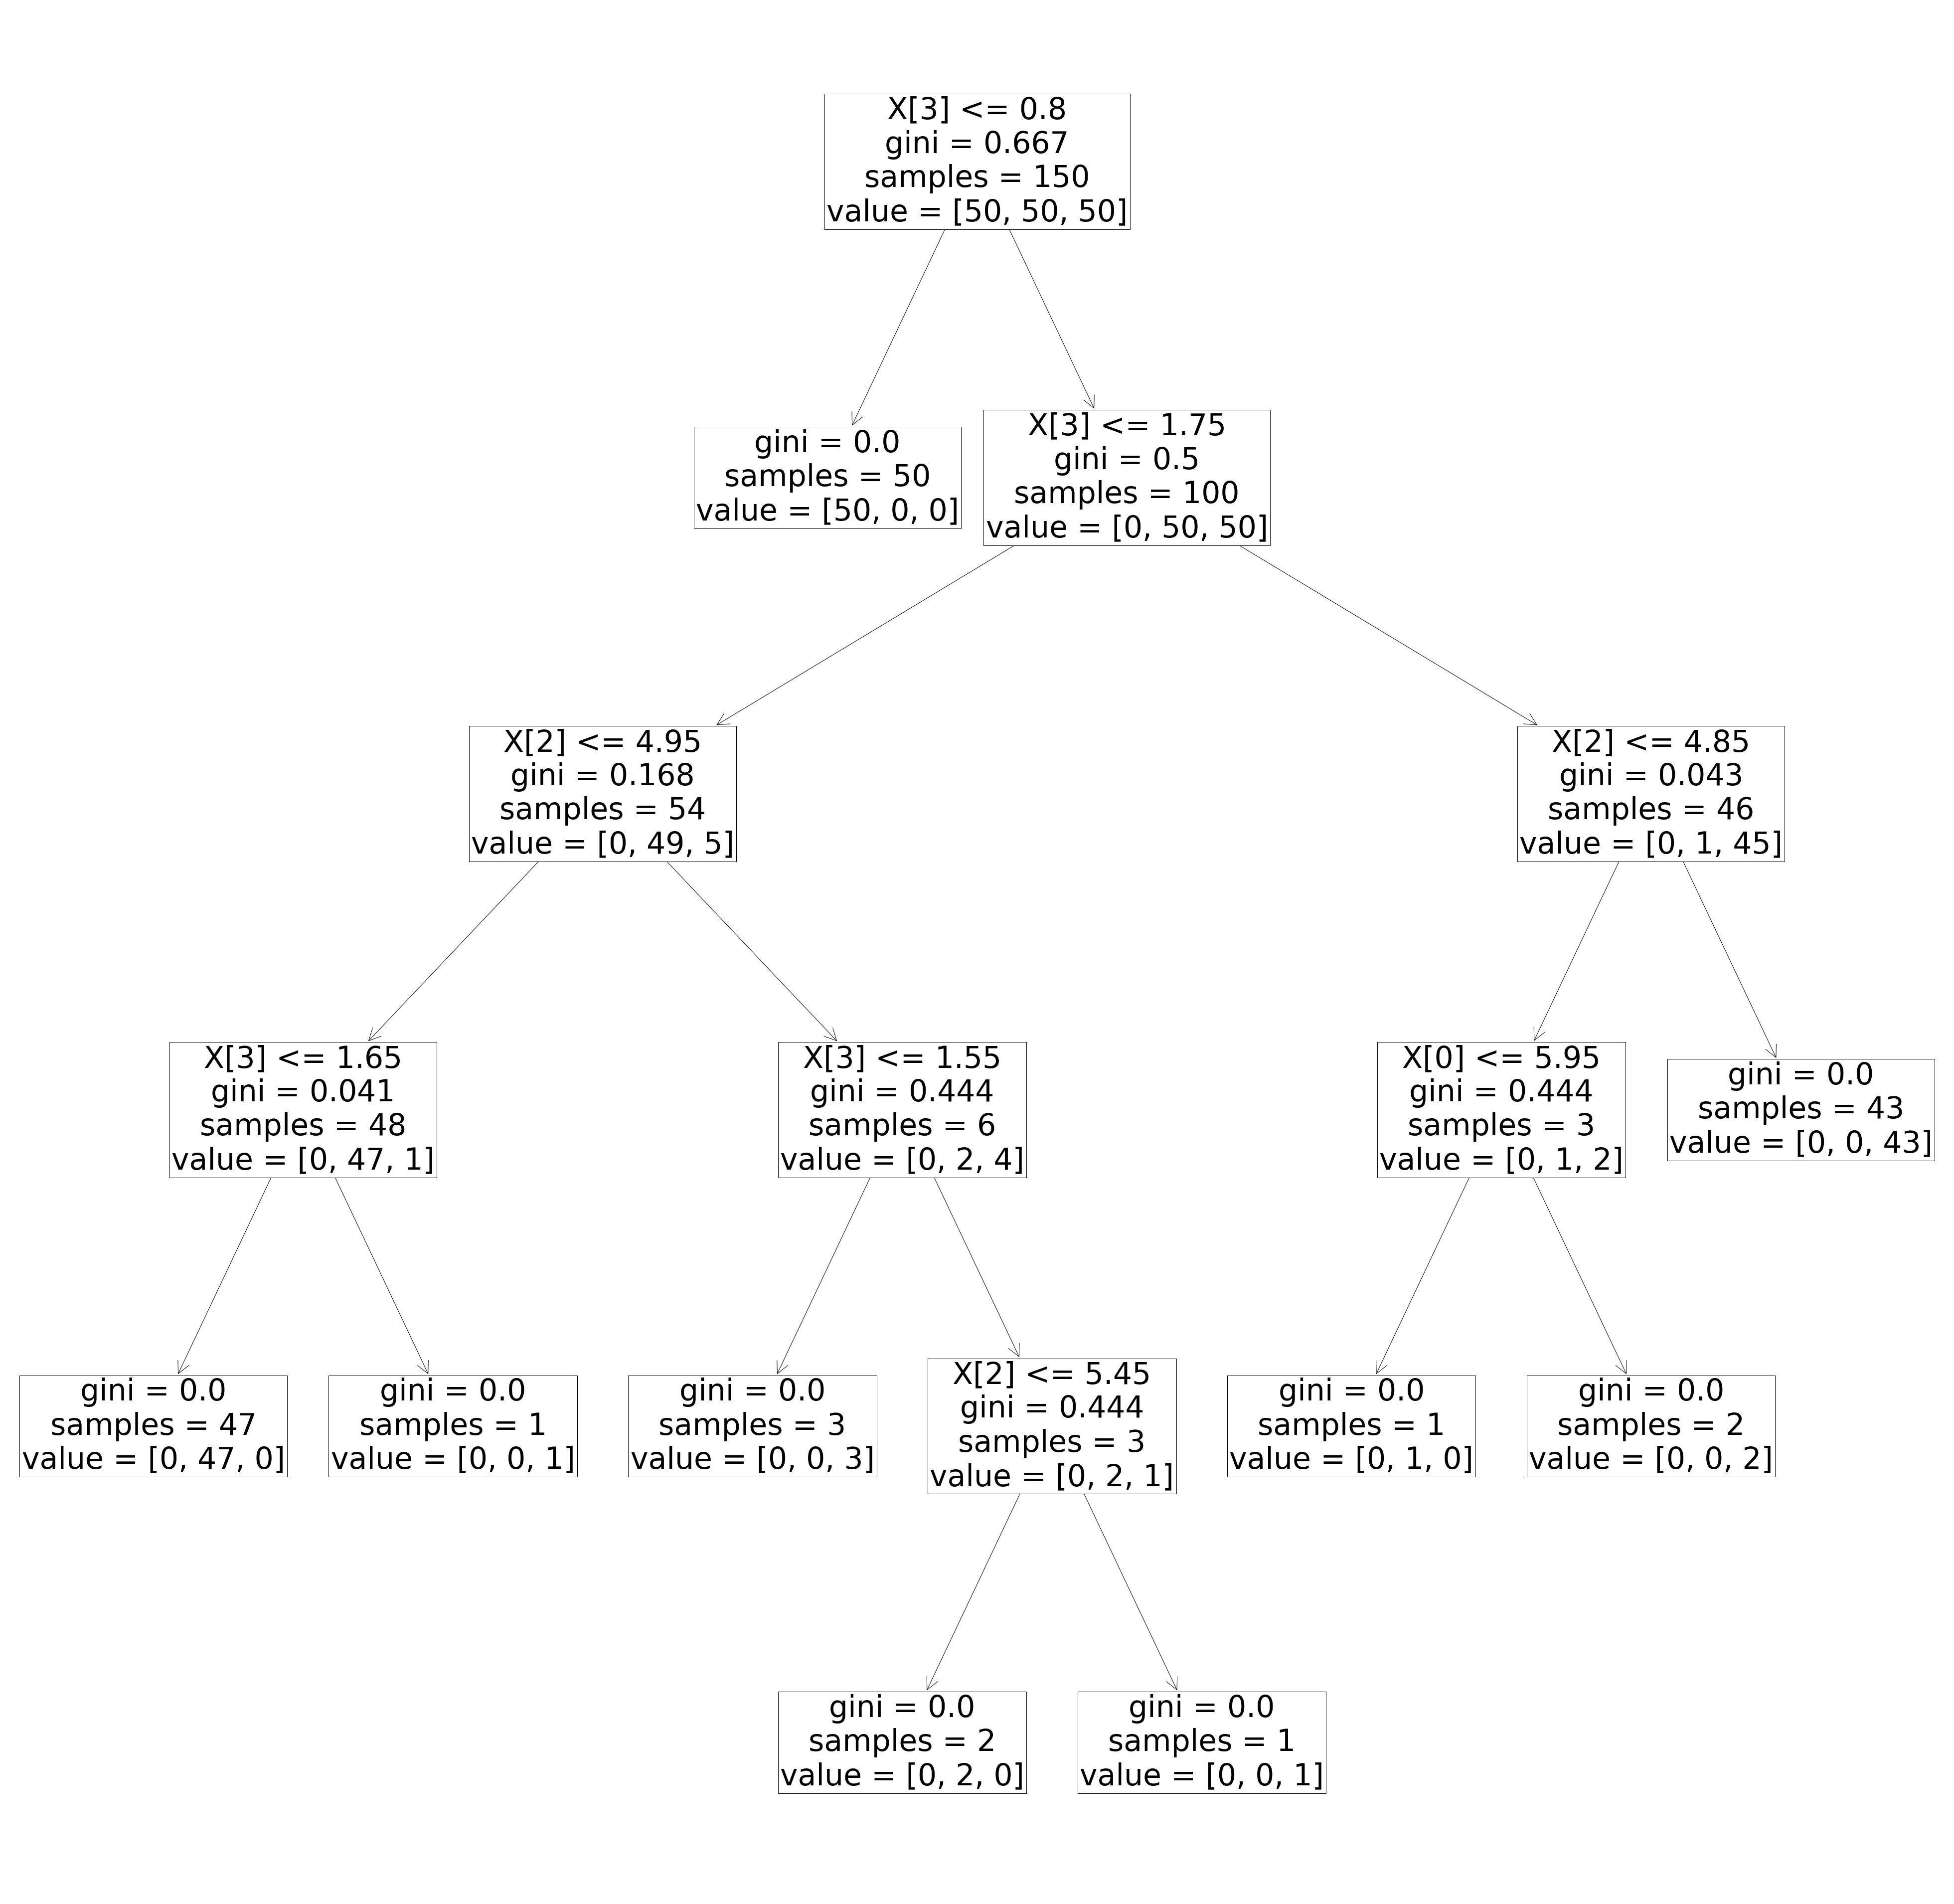

In [36]:
fig, ax = plt.subplots(figsize=(70, 70))
tree.plot_tree(clf, fontsize=60)
plt.show()

In [37]:
# 1. Compute GINI index for root node:
1-(1/3)*(1/3)-(1/3)*(1/3)-(1/3)*(1/3)

0.6666666666666665

In [38]:
# 2. Compute GINI index for right daughter node of root node:
1-(0)*(0)-(1/2)*(1/2)-(1/2)*(1/2)

0.5

In [39]:
# 3. compute GINI index for the the left daughter node of 2
1-(0)*(0)-(49/(49+5))*(49/(49+5))-(5/(49+5))*(5/(49+5))

0.1680384087791495

In [40]:
# Predict test example to get classification results
predicted_results=clf.predict(iris.data)
predicted_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# Groundtruth and gold standard
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# Compute accuracy by comparing predicted results with ground truth (mark example papers)
print("Accuracy of the Decision Tree with Raw Data:",metrics.accuracy_score(iris.target, predicted_results))

Accuracy of the Decision Tree with Raw Data: 1.0


### The results are TOO good
### because we use training data for test, i.e. given student some exercise questions and answers, and then test the same questions in exam. 

## 1.3. DTs for Classification: Using the Pima dataset

###  Below we provide an example using the PIMA indian diabetes data set. Its objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### 1. Number of pregnant times 
### 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (the classic oral glucose tolerance test measures blood glucose levels five times over a period of three hours. Some physicians simply take a baseline blood sample followed by a sample two hours after drinking the glucose solution. In a person without diabetes, the glucose levels rise and then fall quickly.)
### 3. Diastolic blood pressure (mm Hg)
### 4. Triceps skin fold thickness (mm)
### 5. 2-Hour serum insulin (mu U/ml)
### 6. Body mass index (weight in kg/(height in m)^2)
### 7. Diabetes pedigree function
### 8. Age (years)
### 9. Class variable (0 or 1)

In [43]:
### Load the data and specify the input parameters required
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("Diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
###split dataset in features and target variable
# We can ignore some features that may not be relevant, e.g. skin
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [45]:
X.head()

,pregnant,glucose,bp,insulin,bmi,pedigree,age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [46]:
len(X)

768

In [47]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [48]:
### Split data into train_test with 70% as training and 30% as test
### random_state=1, use the same seed so that we can get the same results (you can change it to get different datasets)
### Without random_state, we generate the different training and test set each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
X_train

,pregnant,glucose,bp,insulin,bmi,pedigree,age
88,15,136,70,110,37.1,0.153,43
467,0,97,64,100,36.8,0.600,25
550,1,116,70,0,27.4,0.204,21
147,2,106,64,119,30.5,1.400,34
481,0,123,88,0,35.2,0.197,29
...,...,...,...,...,...,...,...
645,2,157,74,440,39.4,0.134,30
715,7,187,50,392,33.9,0.826,34
72,13,126,90,0,43.4,0.583,42
235,4,171,72,0,43.6,0.479,26


In [50]:
 X_test

,pregnant,glucose,bp,insulin,bmi,pedigree,age
285,7,136,74,135,26.0,0.647,51
101,1,151,60,0,26.1,0.179,22
581,6,109,60,0,25.0,0.206,27
352,3,61,82,0,34.4,0.243,46
726,1,116,78,180,36.1,0.496,25
...,...,...,...,...,...,...,...
241,4,91,70,88,33.1,0.446,22
599,1,109,38,120,23.1,0.407,26
650,1,91,54,100,25.2,0.234,23
11,10,168,74,0,38.0,0.537,34


In [51]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: label, Length: 537, dtype: int64

In [52]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: label, Length: 231, dtype: int64

In [53]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()  # We want to build a DT               

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train) # Fit the training data X and labels Y

In [54]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Compute accuracy
print("Accuracy of the Decision Tree with Raw Data:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Decision Tree with Raw Data: 0.670995670995671


### Decision tree could have different depth, which is a parameter k
### We want to study how the different depth affects the prediction results.

In [55]:
Accu =[]  # This will store accuracy for different depth, [] define an empty list
for k in range(1,10): # k is depth of tree, starting from 1 to 10
    clf = tree.DecisionTreeClassifier(max_depth = k)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    accuracy_k =  metrics.accuracy_score(y_test, y_pred)
    Accu.append(accuracy_k) 
    print("Dept=", k)
    print("Accuracy:\n",accuracy_k)
    print("Confsuion Matrix:", metrics.confusion_matrix(y_test, y_pred))
    print("\n")    

Dept= 1
Accuracy:
 0.7532467532467533
Confsuion Matrix: [[121  25]
 [ 32  53]]


Dept= 2
Accuracy:
 0.7575757575757576
Confsuion Matrix: [[127  19]
 [ 37  48]]


Dept= 3
Accuracy:
 0.7575757575757576
Confsuion Matrix: [[127  19]
 [ 37  48]]


Dept= 4
Accuracy:
 0.7662337662337663
Confsuion Matrix: [[123  23]
 [ 31  54]]


Dept= 5
Accuracy:
 0.7575757575757576
Confsuion Matrix: [[121  25]
 [ 31  54]]


Dept= 6
Accuracy:
 0.7012987012987013
Confsuion Matrix: [[118  28]
 [ 41  44]]


Dept= 7
Accuracy:
 0.7229437229437229
Confsuion Matrix: [[125  21]
 [ 43  42]]


Dept= 8
Accuracy:
 0.7142857142857143
Confsuion Matrix: [[122  24]
 [ 42  43]]


Dept= 9
Accuracy:
 0.696969696969697
Confsuion Matrix: [[121  25]
 [ 45  40]]




In [56]:
Accu

[0.7532467532467533,
 0.7575757575757576,
 0.7575757575757576,
 0.7662337662337663,
 0.7575757575757576,
 0.7012987012987013,
 0.7229437229437229,
 0.7142857142857143,
 0.696969696969697]

Text(0, 0.5, 'Accuracies')

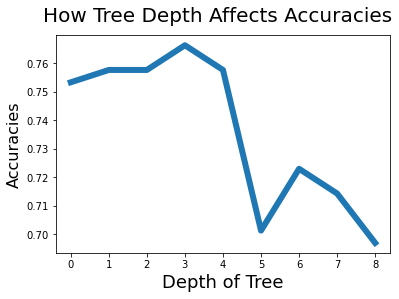

In [57]:
fig = plt.figure()
plt.plot(Accu, linewidth=6)
fig.suptitle('How Tree Depth Affects Accuracies', fontsize=20)
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Accuracies', fontsize=16)

# 2.  DTs for Regression using a toy example

In [58]:
# Regression is to predict numeric values
X = [[0, 0], [1, 1], [2, 2]]  # 3 2-d vectors
y = [0.5, 1.5, 2.5]    # 3 values

In [59]:
reg = tree.DecisionTreeRegressor() # We build a regression model
reg = reg.fit(X, y)

In [60]:
reg.predict([[1, 1]]) # predict a test data

array([1.5])

In [61]:
reg.predict([[0.5, 0.5]]) # predict a test data

array([0.5])

In [62]:
reg.predict([[3, 3]]) # predict a test data

array([2.5])

In [63]:
reg.predict([[0.7, 0.8]]) # predict a test data

array([1.5])